0. Описание задачи

Данные об оттоке клиентов Telco содержат информацию о вымышленной телекоммуникационной компании, которая предоставляла услуги домашнего телевидения и Интернета 7043 клиентам в Калифорнии в третьем квартале. Они показывают, какие клиенты ушли, остались или подписались на их услуги. Необходимо предугадать, какие клиетны останутся, а какие уйдут.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns 

1. Чтение данных

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/daniilanikin1/ML_homework/main/telco.csv')

In [3]:
data

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [4]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

Customer ID - уникальный идентификатор, который идентифицирует каждого клиента

Gender - пол клиента

Age - текущий возраст клиента в годах на момент окончания финансового квартала

Under - указывает, клиенту меньше 30 лет

Senior Citizen - указывает, клиенту 65 лет или старше

Married - в браке ли клиент

Dependents - проживает ли клиент с иждивенцами. Иждивенцами могут быть дети, родители, бабушки и дедушки и т.д.

Number of Dependents - указывает количество иждивенцев, проживающих с клиентом

Country - страна основного места жительства клиента

State - штат основного места жительства клиента

City - город основного места жительства клиента

Zip Code - почтовый индекс основного места жительства клиента

Latitude - широта основного места жительства клиента

Longitude - долгота основного места жительства клиента

Population - текущая оценка численности населения для всей области почтового индекса

Quarter - финансовый квартал, из которого были получены данные

Referred a Friend - рекомендовал ли клиент когда-либо друга или члена семьи в эту компанию

Number of Referrals - количество рекомендаций, сделанных клиентом на сегодняшний день

Tenure in Months - общее количество месяцев, в течение которых клиент был в компании к концу квартала, указанного выше

Offer - последнее маркетинговое предложение, которое принял клиент, если применимо

Phone Service - подписан ли клиент на услугу домашнего телефона в компании

Avg Monthly Long Distance Charges - средние расходы клиента на междугородние звонки, рассчитанные на конец квартала, указанного выше

Multiple Lines - подписан ли клиент на несколько телефонных линий в компании

Internet Service - подписан ли клиент на интернет-услуги в компании

Internet Type - тип интернет соединения

Avg Monthly GB Download - средний объем загрузки клиента в гигабайтах, рассчитанный на конец квартала, указанного выше

Online Security - подписан ли клиент на дополнительную услугу онлайн-безопасности, предоставляемую компанией

Online Backup - подписан ли клиент на дополнительную услугу онлайн-резервного копирования, предоставляемую компанией

Device Protection Plan - подписан ли клиент на дополнительный план защиты устройств для своего интернет-оборудования, предоставляемого компанией

Premium Tech Support - подписан ли клиент на дополнительный план технической поддержки от компании с сокращенным временем ожидания

Streaming TV - использует ли клиент свой интернет-сервис для потоковой передачи телевизионных программ от стороннего провайдера

Streaming Movies - использует ли клиент свой интернет-сервис для потоковой передачи фильмов от стороннего провайдера

Streaming Music - использует ли клиент свой интернет-сервис для потоковой передачи музыки от стороннего провайдера

Unlimited Data - внес ли клиент дополнительную ежемесячную плату за неограниченную загрузку/выгрузку данных

Contract - текущий тип контракта клиента

Paperless Billing - выбрал ли клиент безбумажный счет

Payment Method - как клиент оплачивает свой счет

Monthly Charge - указывает текущую общую ежемесячную плату клиента за все его услуги от компании

Total Charges - указывает общую сумму расходов клиента, рассчитанную на конец квартала, указанного выше

Total Refunds - указывает общую сумму возвратов клиента, рассчитанную на конец квартала, указанного выше

Total Extra Data Charges - общие расходы клиента на дополнительные загрузки данных сверх указанных в его плане к концу квартала, указанного выше

Total Long Distance Charges - общие расходы клиента на междугородние звонки сверх указанных в его плане к концу квартала, указанного выше

Total Revenue - общая сумма оплат на конец квартала, указанного выше

Satisfaction Score - общая оценка удовлетворенности клиента компанией от 1 (очень неудовлетворен) до 5 (очень удовлетворен)

Customer Status - указывает статус клиента на конец квартала

Churn Label - Yes = клиент покинул компанию в этом квартале. No = клиент остался в компании.

Churn Score - значение от 0 до 100, которое рассчитывается с помощью инструмента прогнозирования IBM SPSS Modeler. Модель учитывает несколько факторов, которые, как известно, вызывают отток. Чем выше оценка, тем больше вероятность того, что клиент отток.

CLTV - Ценность клиента. Прогнозируемая CLTV рассчитывается с использованием корпоративных формул и существующих данных. Чем выше значение, тем ценнее клиент.

Churn Category - категория высокого уровня для причины оттока клиента

Churn Reason - конкретная причина ухода клиента из компании.

2. Визуализация данных и расчет основных характеристик

In [5]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [6]:
data.describe(include = 'all')

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
count,7043,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,...,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,1869,1869
unique,7043,2,NaN,2,2,2,2,NaN,1,1,...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,5,20
top,8779-QRDMV,Male,NaN,No,No,No,No,NaN,United States,California,...,NaN,NaN,NaN,NaN,Stayed,No,NaN,NaN,Competitor,Competitor had better devices
freq,1,3555,NaN,5642,5901,3641,5416,NaN,7043,7043,...,NaN,NaN,NaN,NaN,4720,5174,NaN,NaN,841,313
mean,NaN,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692,NaN,NaN,...,6.860713,749.099262,3034.379056,3.244924,NaN,NaN,58.505040,4400.295755,NaN,NaN
std,NaN,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802,NaN,NaN,...,25.104978,846.660055,2865.204542,1.201657,NaN,NaN,21.170031,1183.057152,NaN,NaN
min,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,0.000000,21.360000,1.000000,NaN,NaN,5.000000,2003.000000,NaN,NaN
25%,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,70.545000,605.610000,3.000000,NaN,NaN,40.000000,3469.000000,NaN,NaN
50%,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,401.440000,2108.640000,3.000000,NaN,NaN,61.000000,4527.000000,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,1191.100000,4801.145000,4.000000,NaN,NaN,75.500000,5380.500000,NaN,NaN


Проверим, сколько категориальных и количественных признаков.

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(f'Категориальные признаки (количество): {len(categorical_columns)}')
print(f'Категориальные признаки: {categorical_columns}')
print(f'Количественные признаки (количество): {len(numerical_columns)}')
print(f'Количественные признаки: {numerical_columns}')

Категориальные признаки (количество): 31
Категориальные признаки: ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label', 'Churn Category', 'Churn Reason']
Количественные признаки (количество): 19
Количественные признаки: ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']


Слишком много признаков, поэтому построим корреляционную матрицу, чтобы проверить зависимость между переменными. Если будет замечена большая зависимость между переменными, построим для них матрицу рассеивания.

In [8]:
corr_data = data.corr(numeric_only=True)
corr_data

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.018881,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,-0.085170,0.083919,-0.001826
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,-0.015486,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,0.152873,-0.160743,0.049611
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,-0.424067,0.001463,0.007146,0.005894,-0.010998,-0.010775,0.001978,-0.003797,-0.014550,0.005063,0.002944,0.002121,-0.018020,-0.003207
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,-0.434801,0.018715,0.011963,0.002631,-0.027676,-0.030325,-0.002784,-0.009901,-0.013233,0.008029,0.000082,0.022367,-0.037615,0.000214
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,0.296288,-0.009893,-0.009672,-0.004341,0.030979,0.028429,0.003811,-0.000597,0.010461,-0.006923,0.001062,-0.009048,0.019394,-0.000513
Population,-0.018881,-0.015486,-0.424067,-0.434801,0.296288,1.000000,-0.007704,-0.012102,-0.018665,0.024759,0.009597,-0.006434,0.019627,0.012031,-0.018640,-0.010546,-0.031056,0.020012,-0.000648
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,-0.007704,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,0.188926,-0.202209,0.122843
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,-0.012102,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,0.210557,-0.224982,0.396292
Avg Monthly Long Distance Charges,-0.011749,-0.007324,0.005894,0.002631,-0.004341,-0.018665,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.001146,0.021857,0.023858
Avg Monthly GB Download,-0.376595,0.129966,-0.010998,-0.027676,0.030979,0.024759,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,-0.091657,0.022421,0.023043


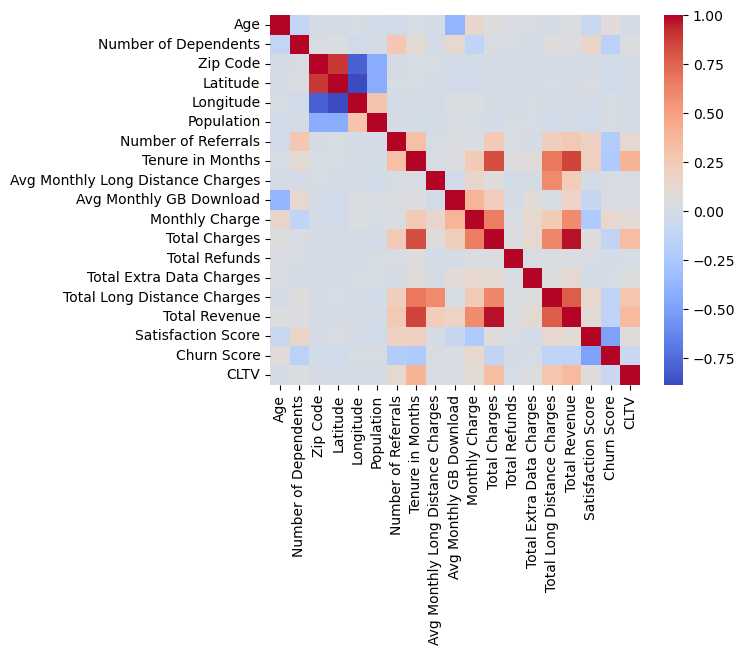

In [9]:
sns.heatmap(corr_data, square=True, cmap='coolwarm')
pass

In [10]:
corr_data.where(np.triu(corr_data > 0.5, k=1)).stack().sort_values(ascending=False)

Total Charges                      Total Revenue                  0.972212
Zip Code                           Latitude                       0.894769
Tenure in Months                   Total Revenue                  0.853146
                                   Total Charges                  0.826074
Total Long Distance Charges        Total Revenue                  0.778559
Tenure in Months                   Total Long Distance Charges    0.674149
Monthly Charge                     Total Charges                  0.651236
Total Charges                      Total Long Distance Charges    0.610185
Avg Monthly Long Distance Charges  Total Long Distance Charges    0.599828
Monthly Charge                     Total Revenue                  0.588887
dtype: float64

Видно, что чем дольше человек пользуется услугами, тем больше у него суммарные затраты (Tenure in Months -> Total Revenue). Можно предположить, что чем дольше человек пользуется услугами, тем реже он переходит к другому представителю. Построим матрицу рассеивания для этих двух переменных.

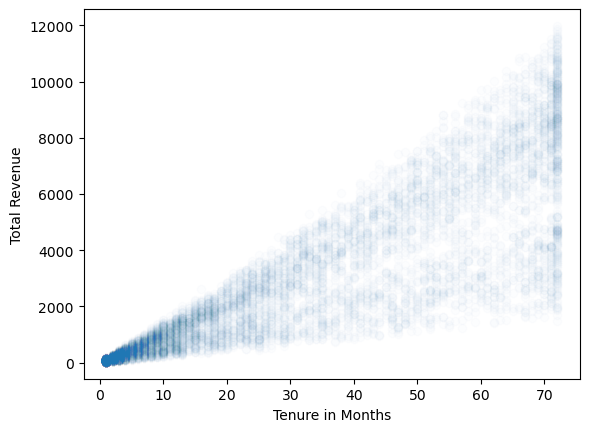

In [11]:
plt.scatter(data['Tenure in Months'], data['Total Revenue'], alpha=0.01)
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
pass

Отрисовка всех точек требует много времени. Тем более, точки накладываются друг на друга и сложно понять сколько точек на том или ином участке графика. Поэтому изобразим 1000 точек

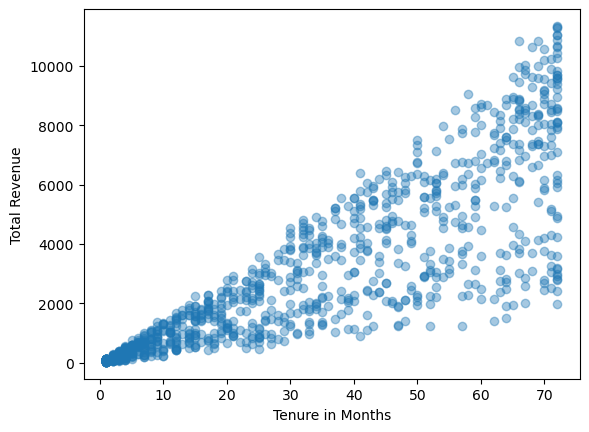

In [12]:
np.random.seed(20)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['Tenure in Months'], data.iloc[random_subset]['Total Revenue'], alpha=0.4)
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
pass

Видно, что тех, кто пришел недавно (до года) - большое количество. Наблюдается линейная зависимость.

Изобразим зависимость Age - Total Revenue

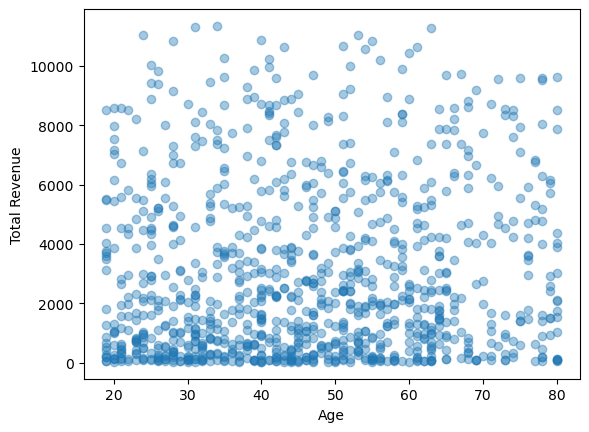

In [13]:
plt.scatter(data.iloc[random_subset]['Age'], data.iloc[random_subset]['Total Revenue'], alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Total Revenue')
pass

Видно, что нет никакой зависимости между данными

Перед обработкой пропущенных значений удалим лишние столбцы (некоторые из них не несут полезной информации, а некоторые дублируют значения)

In [14]:
for c in data:
    print(c, data[c].unique())

Customer ID ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Gender ['Male' 'Female']
Age [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]
Under 30 ['No' 'Yes']
Senior Citizen ['Yes' 'No']
Married ['No' 'Yes']
Dependents ['No' 'Yes']
Number of Dependents [0 1 3 2 5 4 6 7 8 9]
Country ['United States']
State ['California']
City ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
Zip Code [90022 90063 90065 ... 91934 92105 92250]
Latitude [34.02381  34.044271 34.108833 ... 32.649787 32.741859 32.811001]
Longitude [-118.156582 -118.185237 -118.229715 ... -116.2237   -117.090353
 -115.152865]
Population [68701 55668 47534 ...   116 73006  8062]
Quarter ['Q3']
Referred a Friend ['No' 'Yes']
Number of Referrals [ 0  1  6  2  4  3  7  5  8  9 10 11]
Tenure in Months [ 1  8 18 25 37 27 58 15  7 11  

Удаляем: Customer ID (излишняя информация), Under 30 (дублируется в Age), Senior Citizen (дублируется в Age), Dependents (дублируется в Number of Dependents), Country (одно значение, ни на что не влияет), State (одно значение, ни на что не влияет), City (излишняя информация), Zip Code (излишняя информация), Latitude (излишняя информация), Longitude (излишняя информация), Population (излишняя информация), Quarter (одно значение, ни на что не влияет), Referred a Friend (дублируется в Number of Referrals), Customer Status (дублируется в Churn Label), Churn Score, Churn Category, Churn Reason (все спрашивается после ухода), Tenure in Months, Total Charges (большой коэффициент корреляции с Total Revenue)

In [15]:
data = data.drop(columns=['Customer ID', 'Under 30', 'Senior Citizen', 'Dependents', 'Country', 'State', 'City', 'Zip Code', 'Population',
                          'Quarter', 'Latitude', 'Longitude', 'Referred a Friend','Customer Status', 'Churn Score', 'Churn Category', 
                          'Churn Reason', 'Tenure in Months', 'Total Charges'])

Выведем обновленный датасет

In [16]:
data

,Gender,Age,Married,Number of Dependents,Number of Referrals,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label,CLTV
0,Male,78,No,0,0,NaN,No,0.00,No,Yes,...,Yes,Bank Withdrawal,39.65,0.00,20,0.00,59.65,3,Yes,5433
1,Female,74,Yes,1,1,Offer E,Yes,48.85,Yes,Yes,...,Yes,Credit Card,80.65,0.00,0,390.80,1024.10,3,Yes,5302
2,Male,71,No,3,0,Offer D,Yes,11.33,Yes,Yes,...,Yes,Bank Withdrawal,95.45,45.61,0,203.94,1910.88,2,Yes,3179
3,Female,78,Yes,1,1,Offer C,Yes,19.76,No,Yes,...,Yes,Bank Withdrawal,98.50,13.43,0,494.00,2995.07,2,Yes,5337
4,Female,80,Yes,1,1,Offer C,Yes,6.33,Yes,Yes,...,Yes,Bank Withdrawal,76.50,0.00,0,234.21,3102.36,2,Yes,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,0,0,NaN,Yes,22.77,No,No,...,Yes,Bank Withdrawal,21.15,19.31,0,1639.44,3039.53,5,No,5306
7039,Male,38,Yes,2,1,Offer C,Yes,36.05,Yes,Yes,...,Yes,Mailed Check,84.80,48.23,0,865.20,2807.47,3,No,2140
7040,Female,30,Yes,2,4,NaN,Yes,29.66,Yes,Yes,...,Yes,Credit Card,103.20,45.38,0,2135.52,9453.04,4,No,5560
7041,Female,32,Yes,2,1,NaN,No,0.00,No,Yes,...,Yes,Bank Withdrawal,29.60,27.24,0,0.00,319.21,4,No,2793


3. Обработка пропущенных значений

Проверим наличие пропущенных значений

In [17]:
data.isna().sum() 

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                    

Видно, что есть два столбца с пропущенными значениями. Оба столбца с категориальными признаками, их можно или удалить, или заполнить модой. Стобец Offer имеет более 50% пропущенных значений, поэтому удалим этот столбец. Столбец Internet Type зависит напрямую от Internet Service (то есть если в Internet Service было значение No, то в Internet Type помещается значение None). Поэтому пустые значения не будем удалять и заменять модой, а заменим все пустые значения на No и удалим столбец Internet Service.

In [18]:
data['Internet Type'] = data['Internet Type'].fillna('No')
data = data.drop(columns=['Offer', 'Internet Service'])

Проверим изменения

In [19]:
data.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue            

In [20]:
data['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable', 'No'], dtype=object)

In [21]:
data

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,...,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label,CLTV
0,Male,78,No,0,0,No,0.00,No,DSL,8,...,Yes,Bank Withdrawal,39.65,0.00,20,0.00,59.65,3,Yes,5433
1,Female,74,Yes,1,1,Yes,48.85,Yes,Fiber Optic,17,...,Yes,Credit Card,80.65,0.00,0,390.80,1024.10,3,Yes,5302
2,Male,71,No,3,0,Yes,11.33,Yes,Fiber Optic,52,...,Yes,Bank Withdrawal,95.45,45.61,0,203.94,1910.88,2,Yes,3179
3,Female,78,Yes,1,1,Yes,19.76,No,Fiber Optic,12,...,Yes,Bank Withdrawal,98.50,13.43,0,494.00,2995.07,2,Yes,5337
4,Female,80,Yes,1,1,Yes,6.33,Yes,Fiber Optic,14,...,Yes,Bank Withdrawal,76.50,0.00,0,234.21,3102.36,2,Yes,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,0,0,Yes,22.77,No,No,0,...,Yes,Bank Withdrawal,21.15,19.31,0,1639.44,3039.53,5,No,5306
7039,Male,38,Yes,2,1,Yes,36.05,Yes,Cable,24,...,Yes,Mailed Check,84.80,48.23,0,865.20,2807.47,3,No,2140
7040,Female,30,Yes,2,4,Yes,29.66,Yes,Fiber Optic,59,...,Yes,Credit Card,103.20,45.38,0,2135.52,9453.04,4,No,5560
7041,Female,32,Yes,2,1,No,0.00,No,DSL,17,...,Yes,Bank Withdrawal,29.60,27.24,0,0.00,319.21,4,No,2793


4. Обработка категориальных признаков

Так как были удалены столбцы, уточним количество категориальных и количественных признаков.

In [22]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(f'Категориальные признаки (количество): {len(categorical_columns)}')
print(f'Категориальные признаки: {categorical_columns}')
print(f'Количественные признаки (количество): {len(numerical_columns)}')
print(f'Количественные признаки: {numerical_columns}')

Категориальные признаки (количество): 17
Категориальные признаки: ['Gender', 'Married', 'Phone Service', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']
Количественные признаки (количество): 12
Количественные признаки: ['Age', 'Number of Dependents', 'Number of Referrals', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV']


Теперь обработаем категориальные признаки. Разобьем их на бинарные и небинарные

In [23]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns, sep='\n')

['Gender', 'Married', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Churn Label']
['Internet Type', 'Contract', 'Payment Method']


Обработка бинарных признаков

In [24]:
for i in binary_columns:
    data[i] = pd.factorize(data[i])[0]

In [25]:
data

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,...,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label,CLTV
0,0,78,0,0,0,0,0.00,0,DSL,8,...,0,Bank Withdrawal,39.65,0.00,20,0.00,59.65,3,0,5433
1,1,74,1,1,1,1,48.85,1,Fiber Optic,17,...,0,Credit Card,80.65,0.00,0,390.80,1024.10,3,0,5302
2,0,71,0,3,0,1,11.33,1,Fiber Optic,52,...,0,Bank Withdrawal,95.45,45.61,0,203.94,1910.88,2,0,3179
3,1,78,1,1,1,1,19.76,0,Fiber Optic,12,...,0,Bank Withdrawal,98.50,13.43,0,494.00,2995.07,2,0,5337
4,1,80,1,1,1,1,6.33,1,Fiber Optic,14,...,0,Bank Withdrawal,76.50,0.00,0,234.21,3102.36,2,0,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,30,0,0,0,1,22.77,0,No,0,...,0,Bank Withdrawal,21.15,19.31,0,1639.44,3039.53,5,1,5306
7039,0,38,1,2,1,1,36.05,1,Cable,24,...,0,Mailed Check,84.80,48.23,0,865.20,2807.47,3,1,2140
7040,1,30,1,2,4,1,29.66,1,Fiber Optic,59,...,0,Credit Card,103.20,45.38,0,2135.52,9453.04,4,1,5560
7041,1,32,1,2,1,0,0.00,0,DSL,17,...,0,Bank Withdrawal,29.60,27.24,0,0.00,319.21,4,1,2793


Обработка небинарных признаков (с помощью one-hot encoding)

In [26]:
for c in nonbinary_columns:
    dummies_cl = pd.get_dummies(data[c], dtype=int)
    data = pd.concat((data, dummies_cl), axis=1)
    data = data.drop([c], axis=1)

In [27]:
data

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,Online Security,...,Cable,DSL,Fiber Optic,No,Month-to-Month,One Year,Two Year,Bank Withdrawal,Credit Card,Mailed Check
0,0,78,0,0,0,0,0.00,0,8,0,...,0,1,0,0,1,0,0,1,0,0
1,1,74,1,1,1,1,48.85,1,17,0,...,0,0,1,0,1,0,0,0,1,0
2,0,71,0,3,0,1,11.33,1,52,0,...,0,0,1,0,1,0,0,1,0,0
3,1,78,1,1,1,1,19.76,0,12,0,...,0,0,1,0,1,0,0,1,0,0
4,1,80,1,1,1,1,6.33,1,14,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,30,0,0,0,1,22.77,0,0,0,...,0,0,0,1,0,0,1,1,0,0
7039,0,38,1,2,1,1,36.05,1,24,1,...,1,0,0,0,0,1,0,0,0,1
7040,1,30,1,2,4,1,29.66,1,59,0,...,0,0,1,0,0,1,0,0,1,0
7041,1,32,1,2,1,0,0.00,0,17,1,...,0,1,0,0,1,0,0,1,0,0


Проверим количество категориальных признаков и выведем их

In [28]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print(f'Категориальные признаки (количество): {len(categorical_columns)}')
print(f'Категориальные признаки: {categorical_columns}')

Категориальные признаки (количество): 0
Категориальные признаки: []


5. Нормализация количественных признаков

Теперь все признаки - количественные. Но после изменения категориальных признаков переменная с количественными не изменялась, поэтому проведем изменения по ней (Если бы переменная переобъявлялась, то пришлось бы соединять бинарные, небинарные и количественные после всех преобразований)

Выполним стандартизацию

In [29]:
for i in numerical_columns:
    data[i] = (data[i] - data[i].mean()) / data[i].std()

Выведем обработанный датасет

In [30]:
data

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,Online Security,...,Cable,DSL,Fiber Optic,No,Month-to-Month,One Year,Two Year,Bank Withdrawal,Credit Card,Mailed Check
0,0,1.879977,0,-0.486800,-0.650362,0,-1.486198,0,-0.612931,0,...,0,1,0,0,1,0,0,1,0,0
1,1,1.641176,1,0.551835,-0.317162,1,1.676001,1,-0.172164,0,...,0,0,1,0,1,0,0,0,1,0
2,0,1.462075,0,2.629105,-0.650362,1,-0.752775,1,1.541931,0,...,0,0,1,0,1,0,0,1,0,0
3,1,1.879977,1,0.551835,-0.317162,1,-0.207077,0,-0.417035,0,...,0,0,1,0,1,0,0,1,0,0
4,1,1.999377,1,0.551835,-0.317162,1,-1.076439,1,-0.319086,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.985635,0,-0.486800,-0.650362,1,-0.012231,0,-1.004724,0,...,0,0,0,1,0,0,1,1,0,0
7039,0,-0.508033,1,1.590470,-0.317162,1,0.847420,1,0.170655,1,...,1,0,0,0,0,1,0,0,0,1
7040,1,-0.985635,1,1.590470,0.682438,1,0.433778,1,1.884750,0,...,0,0,1,0,0,1,0,0,1,0
7041,1,-0.866234,1,1.590470,-0.317162,0,-1.486198,0,-0.172164,1,...,0,1,0,0,1,0,0,1,0,0


Выведем статистические данные

In [31]:
data.describe()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,Online Security,...,Cable,DSL,Fiber Optic,No,Month-to-Month,One Year,Two Year,Bank Withdrawal,Credit Card,Mailed Check
count,7043.000000,7.043000e+03,7043.000000,7043.000000,7.043000e+03,7043.000000,7.043000e+03,7043.000000,7.043000e+03,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,6.456728e-17,0.483033,0.000000,-3.228364e-17,0.903166,-7.112489e-17,0.421837,6.254955e-17,0.286668,...,0.117848,0.234559,0.430924,0.216669,0.512566,0.220077,0.267358,0.555019,0.390317,0.054664
std,0.500013,1.000000e+00,0.499748,1.000000,1.000000e+00,0.295752,1.000000e+00,0.493888,1.000000e+00,0.452237,...,0.322450,0.423753,0.495241,0.412004,0.499878,0.414328,0.442612,0.496999,0.487856,0.227340
min,0.000000,-1.642337e+00,0.000000,-0.486800,-6.503624e-01,0.000000,-1.486198e+00,0.000000,-1.004724e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.662341e-01,0.000000,-0.486800,-6.503624e-01,1.000000,-8.900086e-01,0.000000,-8.578019e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-3.043076e-02,0.000000,-0.486800,-6.503624e-01,1.000000,-4.463559e-03,0.000000,-1.721639e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,8.053726e-01,1.000000,-0.486800,3.492380e-01,1.000000,8.697532e-01,1.000000,3.175774e-01,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.999377e+00,1.000000,8.860916,3.014839e+00,1.000000,1.749796e+00,1.000000,3.158077e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


6. Тестовая и обучающая выборки

Для предсказания будем использовать все входные признаки

In [32]:
X = data.drop(['Churn Label'], axis=1)
y = data['Churn Label']

Формирование обучающей и тестовой выборок (70/30)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

7. kNN

Базовым методом возьмем kNN. В дальнейшем будем его сравнивать с другими методами

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Для проверки работы метода возьмем значение k=7. Так же выведем матрицу рассогласования и некоторые статистические данные.

In [35]:
model = KNeighborsClassifier(n_neighbors=7, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Ошибка на train: {round((1 - model.score(X_train, y_train)) * 100, 2)}%')
print(f'Ошибка на test: {round((1 - model.score(X_test, y_test)) * 100, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       569
           1       0.94      0.97      0.95      1544

    accuracy                           0.93      2113
   macro avg       0.92      0.90      0.91      2113
weighted avg       0.93      0.93      0.93      2113

Confusion Matrix:
 [[ 477   92]
 [  50 1494]]
Ошибка на train: 5.01%
Ошибка на test: 6.72%


8. Подбор оптимальных гиперпараметров. Вычисление ошибок на тестовой и обучающей выборках

Для более точной классификации необходимо подобрать оптимальное значение параметра k.

In [36]:
k_values = range(1, 101)
train_err = []
test_err = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_err.append(1 - model.score(X_train, y_train))
    test_err.append(1 - model.score(X_test, y_test))

Построим график ошибки в зависимости от количества соседей

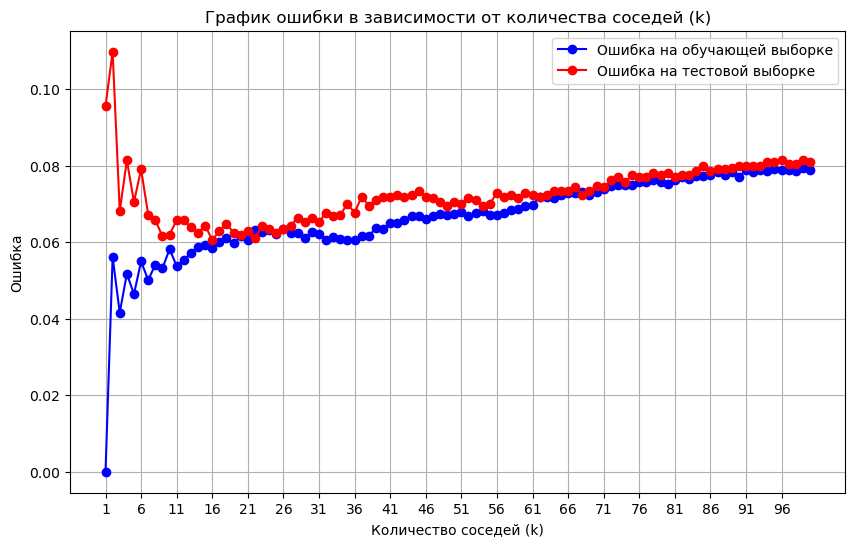

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_err, marker='o', color='blue', label='Ошибка на обучающей выборке')
plt.plot(k_values, test_err, marker='o', color='red', label='Ошибка на тестовой выборке')
plt.title('График ошибки в зависимости от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Ошибка')
plt.xticks(np.arange(1, 101, step=5))
plt.grid()
plt.legend()
plt.show()

Выведем оптимальное значение параметра и ошибки на train, test

In [38]:
best_k = k_values[np.argmin(test_err)]
print(f'Оптимальное значение k: {best_k}')
print(f'Ошибка на train: {round(100 * train_err[test_err.index(min(test_err))], 2)}%')
print(f'Ошибка на test: {round(100 * min(test_err), 2)}%')

Оптимальное значение k: 16
Ошибка на train: 5.84%
Ошибка на test: 6.06%


Оптимальным значением для kNN при p=2 является k=16. Значения, меньше 16, указывают нам на то, что модель была слишком сложной. При k > 16 начинает увеличиваться ошибка на test и train, что говорит нам о том, что модель становится слишком простой.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
model = KNeighborsClassifier(n_neighbors=16, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Ошибка на train: {round((1 - model.score(X_train, y_train)) * 100, 2)}%')
print(f'Ошибка на test: {round((1 - model.score(X_test, y_test)) * 100, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       569
           1       0.95      0.97      0.96      1544

    accuracy                           0.94      2113
   macro avg       0.93      0.91      0.92      2113
weighted avg       0.94      0.94      0.94      2113

Confusion Matrix:
 [[ 488   81]
 [  47 1497]]
Ошибка на train: 5.84%
Ошибка на test: 6.06%


9. Другие классификаторы

Воспользуемся SVC и GBT

9.1 SVC

In [40]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y1_pred = svc.predict(X_test)
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f'Classification Report:\n {classification_report(y_test, y1_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y1_pred)}')
print(f'Ошибка на train: {round(100 * err_train, 2)}%')
print(f'Ошибка на test: {round(100 * err_test, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       569
           1       0.95      0.99      0.97      1544

    accuracy                           0.96      2113
   macro avg       0.96      0.93      0.94      2113
weighted avg       0.96      0.96      0.95      2113

Confusion Matrix:
 [[ 497   72]
 [  23 1521]]
Ошибка на train: 3.67%
Ошибка на test: 4.5%


Подберем оптимальные параметры

In [41]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
GammaS = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': GammaS})
grid.fit(X_train, y_train)
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print(f'Оптимальные параметры: {best_C}, {best_gamma}')

Оптимальные параметры: 10000.0, 0.001


Подставим оптимальные параметры и проверим модель

In [42]:
svc = SVC(C=best_C, gamma=best_gamma).fit(X_train, y_train)
y1_pred = svc.predict(X_test)
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != y1_pred)
print(f'Classification Report:\n {classification_report(y_test, y1_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y1_pred)}')
print(f'Ошибка на train: {round(100 * err_train, 2)}%')
print(f'Ошибка на test: {round(100 * err_test, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       569
           1       0.97      0.98      0.97      1544

    accuracy                           0.96      2113
   macro avg       0.96      0.95      0.95      2113
weighted avg       0.96      0.96      0.96      2113

Confusion Matrix:
 [[ 518   51]
 [  29 1515]]
Ошибка на train: 2.27%
Ошибка на test: 3.79%


Видно, что модель SVC работает лучше, чем kNN

9.2 GBT

In [43]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)
y1_pred = gbt.predict(X_test)
err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != y1_pred)
print(f'Classification Report:\n {classification_report(y_test, y1_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y1_pred)}')
print(f'Ошибка на train: {round(100 * err_train, 2)}%')
print(f'Ошибка на test: {round(100 * err_test, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       569
           1       0.96      0.99      0.97      1544

    accuracy                           0.96      2113
   macro avg       0.96      0.94      0.95      2113
weighted avg       0.96      0.96      0.96      2113

Confusion Matrix:
 [[ 512   57]
 [  22 1522]]
Ошибка на train: 2.31%
Ошибка на test: 3.74%


Подберем оптимальные параметры

In [44]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
grid_search = GridSearchCV(gbt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Оптимальные параметры: {best_params}")

Оптимальные параметры: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


Подставим оптимальные параметры и проверим модель

In [45]:
gbt = ensemble.GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2)
gbt.fit(X_train, y_train)
y1_pred = gbt.predict(X_test)
err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != y1_pred)
print(f'Classification Report:\n {classification_report(y_test, y1_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y1_pred)}')
print(f'Ошибка на train: {round(100 * err_train, 2)}%')
print(f'Ошибка на test: {round(100 * err_test, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       569
           1       0.97      0.99      0.97      1544

    accuracy                           0.96      2113
   macro avg       0.96      0.94      0.95      2113
weighted avg       0.96      0.96      0.96      2113

Confusion Matrix:
 [[ 514   55]
 [  23 1521]]
Ошибка на train: 1.68%
Ошибка на test: 3.69%


Видно, что модель GBT работает еще лучше. По итогу имеем: GBT > SVC > kNN

10. Борьба с несбалансированностью классов

Бороться с несбалансированностью классов можно несколькими методами: взвешивание классов, увеличение или уменьшение выборки, генерация синтетических данных (SMOTE, ADASYN), ансамблирование моделей.

Выше я использовал GBT, он по идее должен хорошо бороться с несбалансированностью классов, но давайте еще сделаем Undersampling и проверим, как себя будут вести модели

Проверим количество объектов в классе и процентное соотношение классов.

In [46]:
y_train

163     0
6946    1
432     0
5723    1
2271    0
       ..
3915    1
1428    0
6537    1
4367    1
2522    0
Name: Churn Label, Length: 4930, dtype: int64

In [47]:
print((y_train==0).mean(), (y_train==1).mean())

0.26369168356997974 0.7363083164300203


Проведем Undersampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=20)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

Проверим количество объектов в классе и процентное соотношение классов после Undersampling.

In [49]:
y_train_resampled

163     0
432     0
2271    0
6       0
1488    0
       ..
2891    1
2739    1
4573    1
6427    1
6528    1
Name: Churn Label, Length: 2600, dtype: int64

In [50]:
print((y_train_resampled==0).mean(), (y_train_resampled==1).mean())

0.5 0.5


Видим, что классы сбалансировались. Проведем обучение моделей на новой тренировочной выборке. Тестовую выборку не изменяем.

kNN

Подберем оптимальные параметры

In [51]:
k_values = range(1, 101)
train_err = []
test_err = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_err.append(1 - model.score(X_train_resampled, y_train_resampled))
    test_err.append(1 - model.score(X_test, y_test))

Построим график ошибок в зависимости от количества соседей

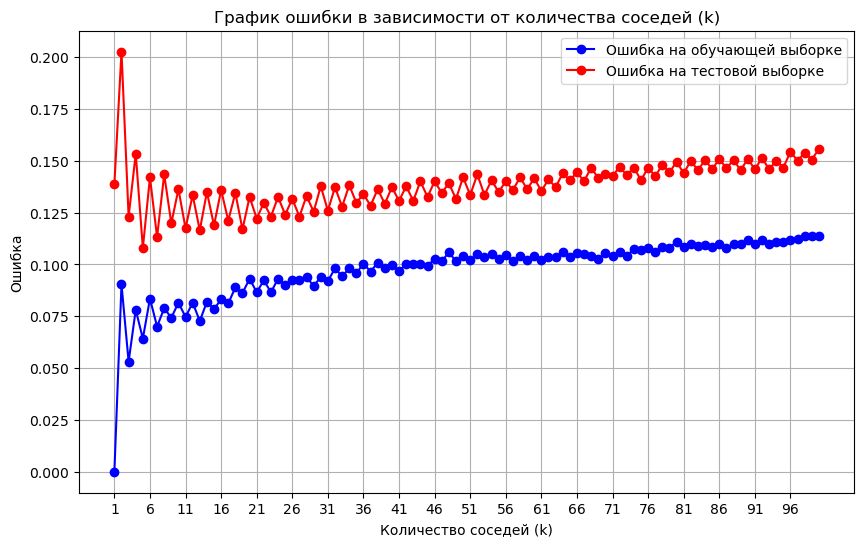

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_err, marker='o', color='blue', label='Ошибка на обучающей выборке')
plt.plot(k_values, test_err, marker='o', color='red', label='Ошибка на тестовой выборке')
plt.title('График ошибки в зависимости от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Ошибка')
plt.xticks(np.arange(1, 101, step=5))
plt.grid()
plt.legend()
plt.show()

Оптимальные параметры и ошибки

In [53]:
best_k = k_values[np.argmin(test_err)]
print(f'Оптимальное значение k: {best_k}')
print(f'Ошибка на train: {round(100 * train_err[test_err.index(min(test_err))], 2)}%')
print(f'Ошибка на test: {round(100 * min(test_err), 2)}%')

Оптимальное значение k: 5
Ошибка на train: 6.42%
Ошибка на test: 10.79%


Проверка модели с оптимальными параметрами

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Ошибка на train: {round((1 - model.score(X_train_resampled, y_train_resampled)) * 100, 2)}%')
print(f'Ошибка на test: {round((1 - model.score(X_test, y_test)) * 100, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.95      0.83       569
           1       0.98      0.87      0.92      1544

    accuracy                           0.89      2113
   macro avg       0.85      0.91      0.87      2113
weighted avg       0.91      0.89      0.90      2113

Confusion Matrix:
 [[ 539   30]
 [ 198 1346]]
Ошибка на train: 6.42%
Ошибка на test: 10.79%


SVC

Подберем оптимальные параметры

In [55]:
Cs = 10.**np.arange(-5, 5)
GammaS = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': GammaS})
grid.fit(X_train_resampled, y_train_resampled)
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print(f'Оптимальные параметры: {best_C}, {best_gamma}')

Оптимальные параметры: 10.0, 0.01


Проверим модель с оптимальными параметрами

In [56]:
svc = SVC(C=best_C, gamma=best_gamma).fit(X_train_resampled, y_train_resampled)
y1_pred = svc.predict(X_test)
err_train = np.mean(y_train_resampled != svc.predict(X_train_resampled))
err_test  = np.mean(y_test  != y1_pred)
print(f'Classification Report:\n {classification_report(y_test, y1_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y1_pred)}')
print(f'Ошибка на train: {round(100 * err_train, 2)}%')
print(f'Ошибка на test: {round(100 * err_test, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       569
           1       0.99      0.94      0.96      1544

    accuracy                           0.94      2113
   macro avg       0.92      0.95      0.93      2113
weighted avg       0.95      0.94      0.94      2113

Confusion Matrix:
 [[ 547   22]
 [  99 1445]]
Ошибка на train: 3.77%
Ошибка на test: 5.73%


 GBT

Подберем оптимальные параметры

In [57]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
grid_search = GridSearchCV(gbt, param_grid=param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print(f"Оптимальные параметры: {best_params}")

Оптимальные параметры: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


Проверим модель с оптимальными параметрами

In [58]:
gbt = ensemble.GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2)
gbt.fit(X_train_resampled, y_train_resampled)
y1_pred = gbt.predict(X_test)
err_train = np.mean(y_train_resampled != gbt.predict(X_train_resampled))
err_test = np.mean(y_test != y1_pred)
print(f'Classification Report:\n {classification_report(y_test, y1_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y1_pred)}')
print(f'Ошибка на train: {round(100 * err_train, 2)}%')
print(f'Ошибка на test: {round(100 * err_test, 2)}%')

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       569
           1       0.98      0.94      0.96      1544

    accuracy                           0.94      2113
   macro avg       0.92      0.95      0.93      2113
weighted avg       0.95      0.94      0.95      2113

Confusion Matrix:
 [[ 544   25]
 [  92 1452]]
Ошибка на train: 2.65%
Ошибка на test: 5.54%


По итогу, все модели стали работать хуже - самое значительное у kNN. Это связано с тем, что уменьшается тренировочная выборка, а следовательно возрастает ошибка.

11. Исключение коррелированных переменных

Я сделал это еще в самом начале при обработке датасета. Использование коррелированных переменных ухудшает качество работы модели. Сильно коррелированные данные представляют из себя одну и ту же информацию, что может привести к переобучению. Происходит мультиколлениарность, что приводит к неустойчивости коэффициентов. Поэтому использование коррелированных переменных - это плохо.

12. Общие выводы

Датасет состоит из 7043 объектов и 50 признаков. Наблюдается несбалансированность классов. Был проведен анализ датасета по исключению ненужных признаков (которые никак не влияют на работу модели или ухудшают ее работу), проведена обработка пропущенных значений (в моем случае - удаление одного столбца из-за избыточности информации и заполнение второго столбца другими значениями). Были рассмотрены 3 различным модели - kNN, SVC и GBT. Лучше всего себя показал GBT (что с несбалансированными классами, что со сбалансированными классами). При несбалансированных классах разница между моделями не сильно существенная (несколько процентов), а при сбалансированных наблюдается сильное ухудшение работы kNN. Каждая модель более точно определяет доминирующий класс (даже после того, как обучающая выборка становится сбалансированной). Подбор оптимальных параметров занимает продолжительное время, но позволяет улучшить модель. Особенно это актуально для kNN.